In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
data = pd.read_csv('./clustering_test_work.csv', index_col=0)

In [19]:
data.head()

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
0,12013601421,2021-02-19,2,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,123,17920.0
1,12013601421,2021-04-19,3,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,182,17920.0
2,12013601421,2021-06-19,4,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,243,17920.0
3,12013601421,2021-08-19,5,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,304,17920.0
4,12013601421,2021-10-19,6,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,365,17920.0


In [20]:
data.num.value_counts()

2     302119
3     287755
4     267929
5     245843
6     227688
7     206809
8     177175
9     151094
10    125186
11     99363
12     78316
13     54145
14     24152
Name: num, dtype: int64

In [21]:
df = data.loc[data.groupby('actual_id')['num'].transform(max) == data['num']]

In [22]:
def make_grade(df):
    if df <= 6:
        return 1
    if df > 6 and df <= 10:
        return 2
    if df > 10 and df <= 14:
        return 3

In [23]:
df['ACTIVE'] = df.num.apply(make_grade)

/tmp/ipykernel_11606/464713565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ACTIVE'] = df.num.apply(make_grade)


In [24]:
df['ACTIVE'].value_counts()

2    107446
3     99363
1     95310
Name: ACTIVE, dtype: int64

/tmp/ipykernel_11606/247400697.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


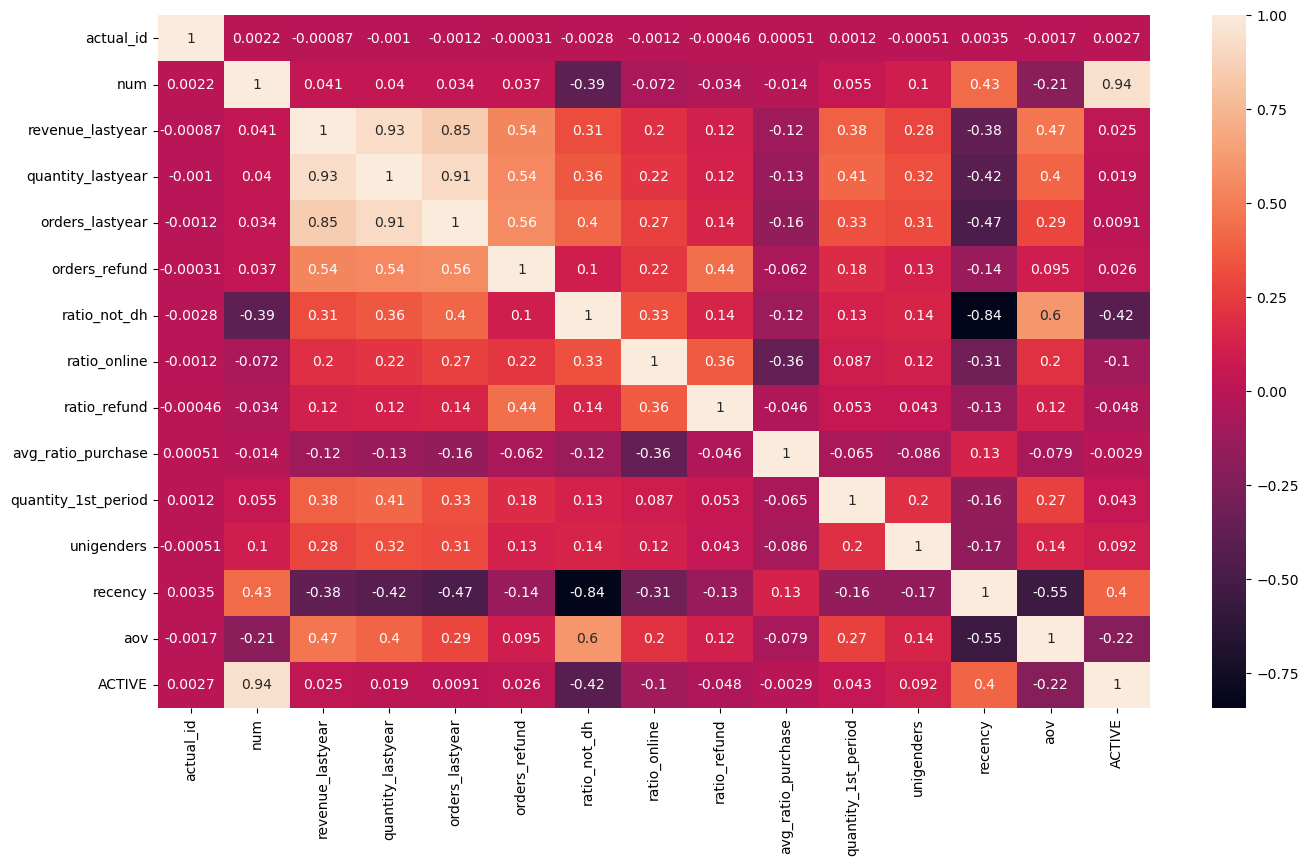

In [25]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True);

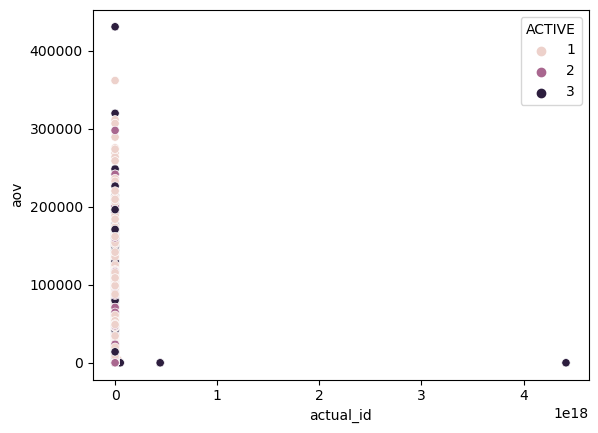

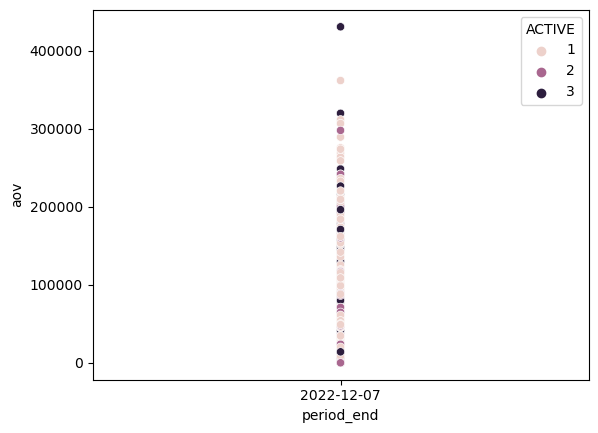

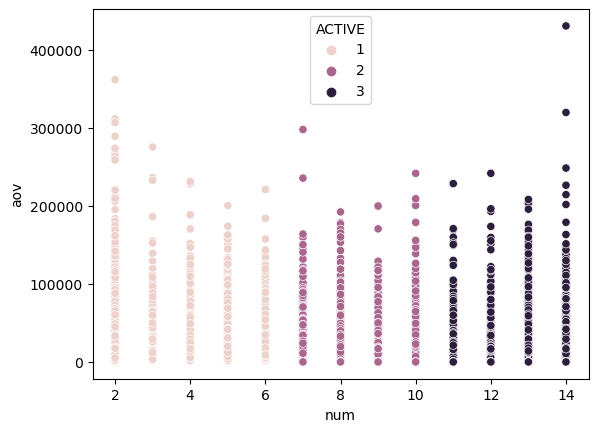

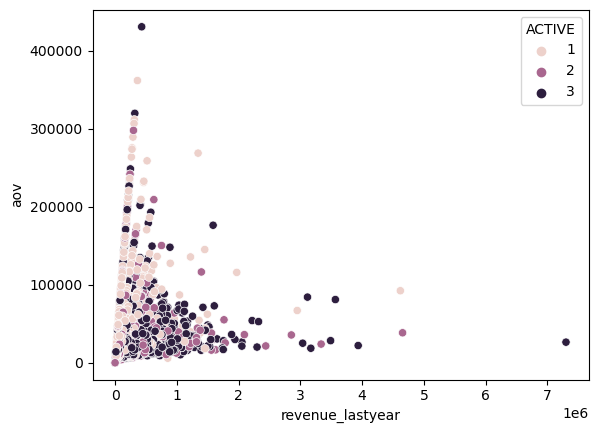

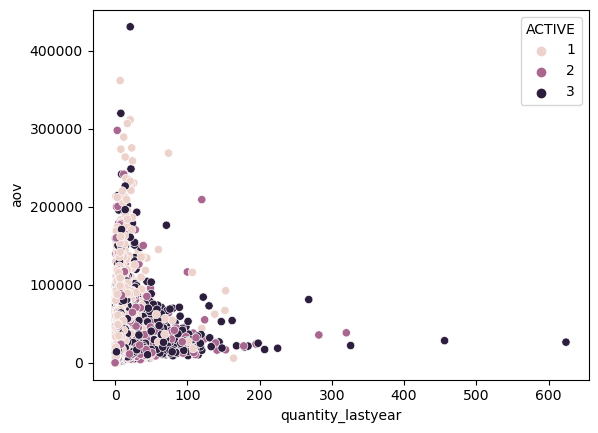

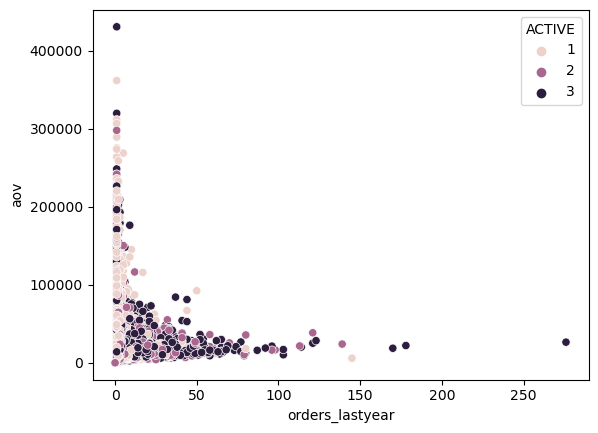

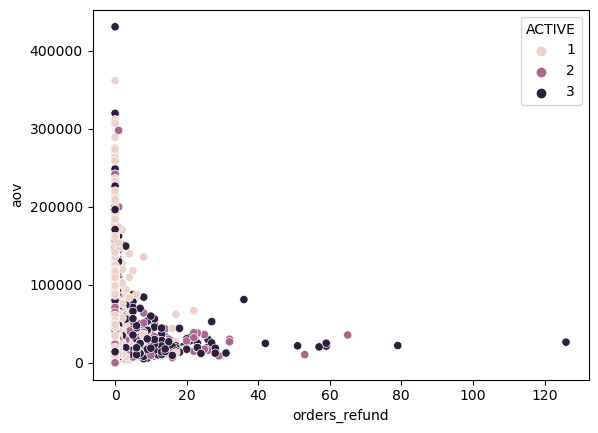

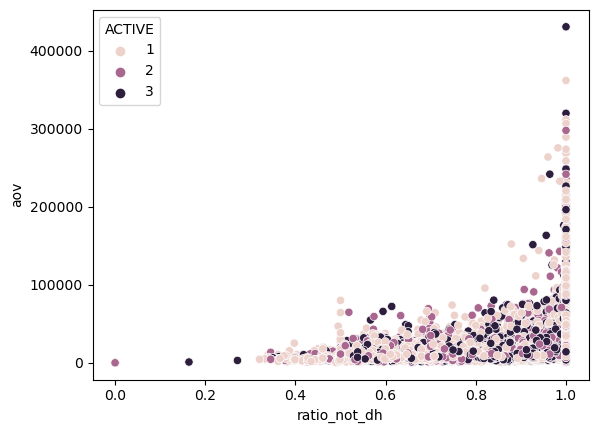

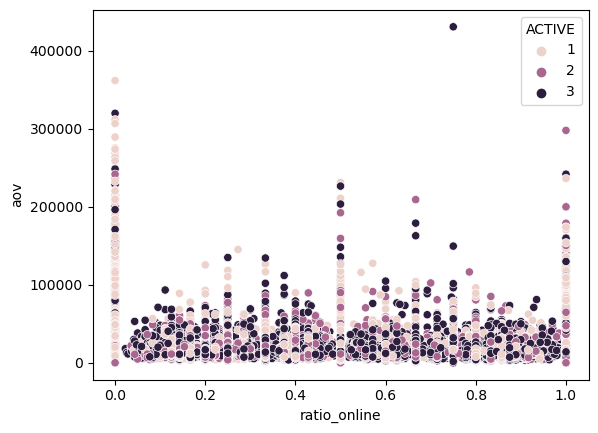

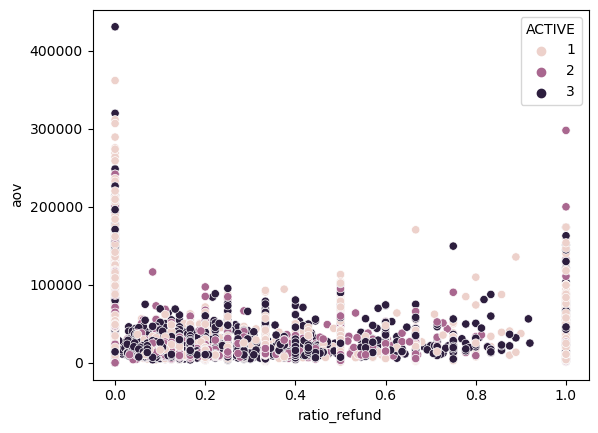

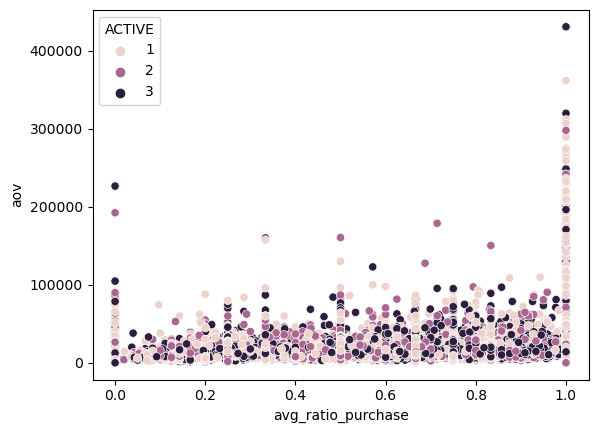

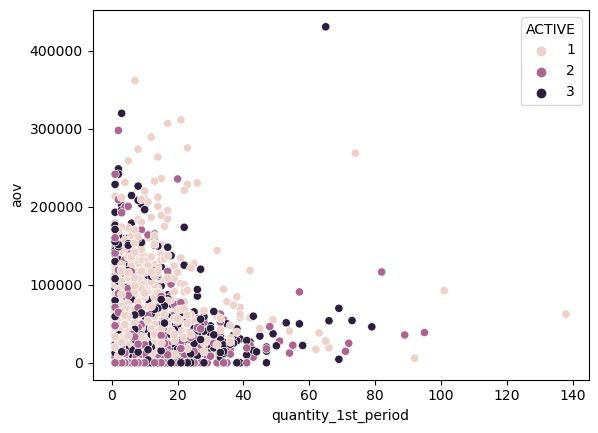

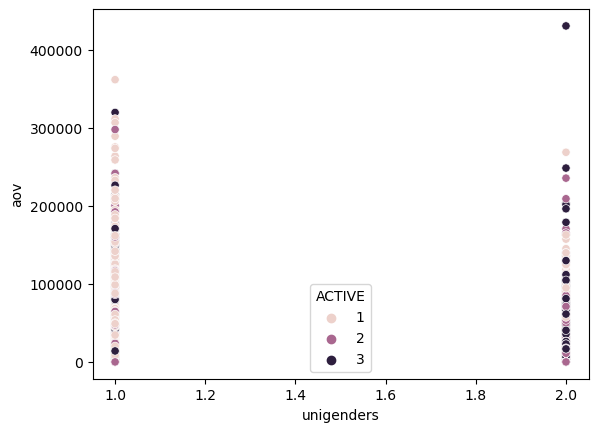

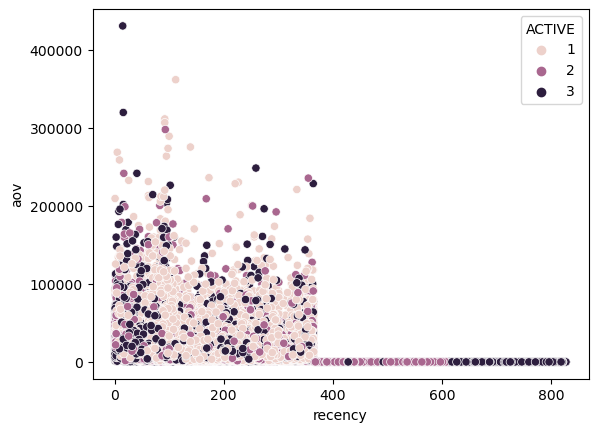

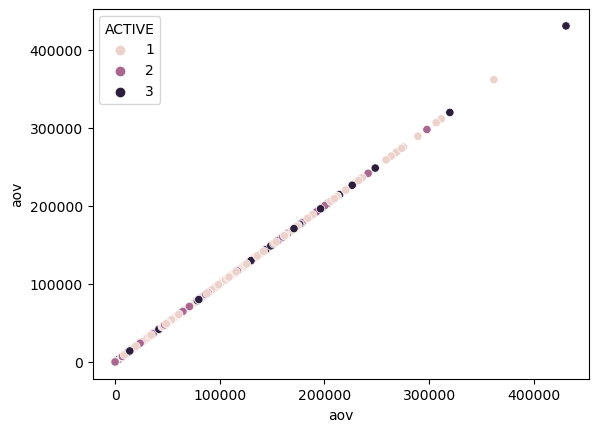

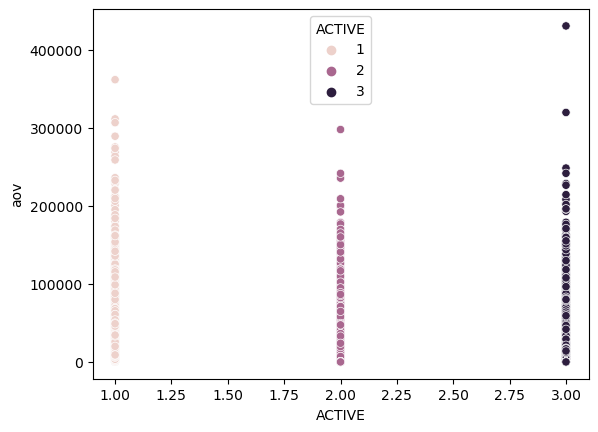

In [26]:
for col in df.columns:
    sns.scatterplot(data=df, x=col, y = 'aov', hue='ACTIVE');
    plt.show()

In [27]:
df = df.drop(['period_end'], axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302119 entries, 11 to 2247573
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   actual_id            302119 non-null  int64  
 1   num                  302119 non-null  int64  
 2   revenue_lastyear     302119 non-null  float64
 3   quantity_lastyear    302119 non-null  int64  
 4   orders_lastyear      302119 non-null  int64  
 5   orders_refund        302119 non-null  int64  
 6   ratio_not_dh         302119 non-null  float64
 7   ratio_online         302119 non-null  float64
 8   ratio_refund         302119 non-null  float64
 9   avg_ratio_purchase   302119 non-null  float64
 10  quantity_1st_period  302119 non-null  float64
 11  unigenders           302119 non-null  int64  
 12  recency              302119 non-null  int64  
 13  aov                  302119 non-null  float64
 14  ACTIVE               302119 non-null  int64  
dtypes: float64(7), 

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [30]:
from sklearn.decomposition import PCA

pca = PCA(random_state=17)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

In [31]:
inertia = []
for k in tqdm(range(1,  10)):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=17).fit(df_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))
inertia

  0%|          | 0/9 [00:00<?, ?it/s]

[2128.798957158704,
 1902.5576877855285,
 1771.6323210022167,
 1681.3783447234725,
 1599.626682179684,
 1504.24301344727,
 1425.0885088554219,
 1349.0408896931617,
 1290.0943837564973]

In [41]:
kmeans = KMeans(n_clusters=3, n_init=100, random_state=17)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=100, random_state=17)

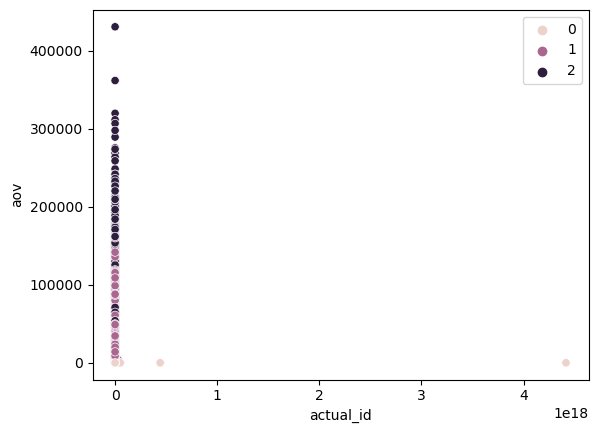

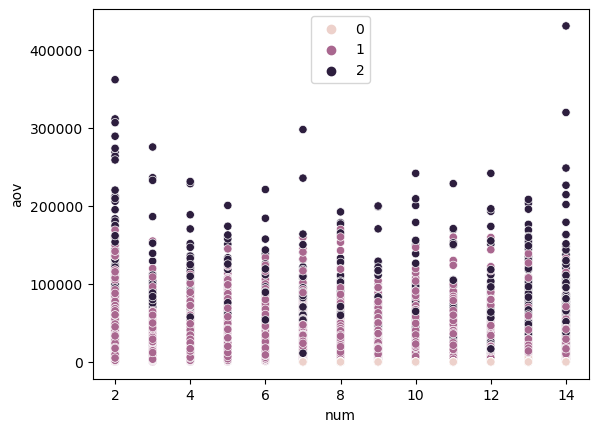

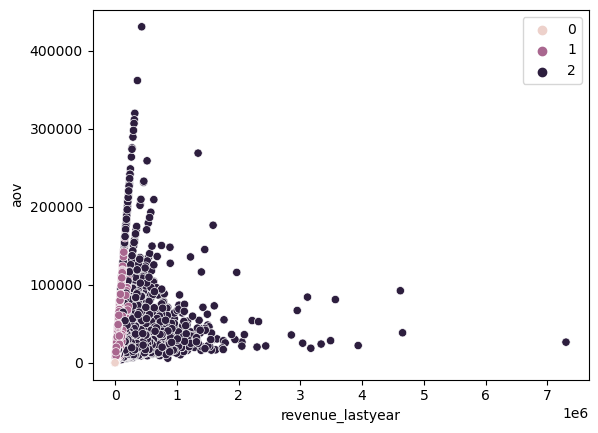

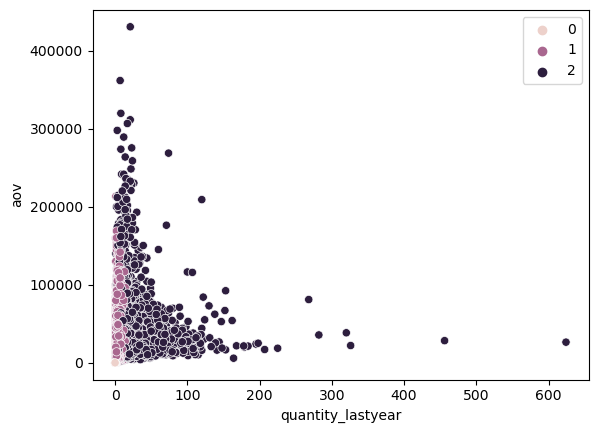

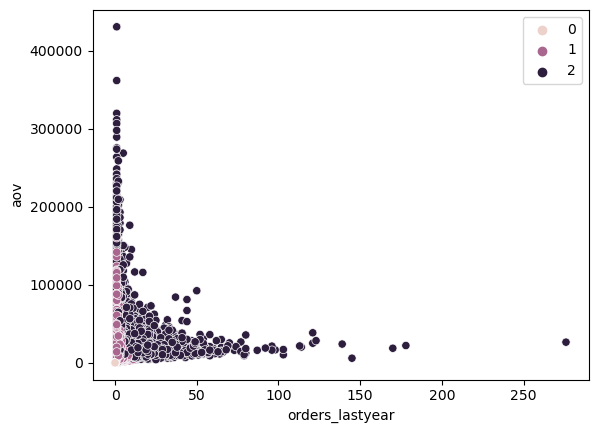

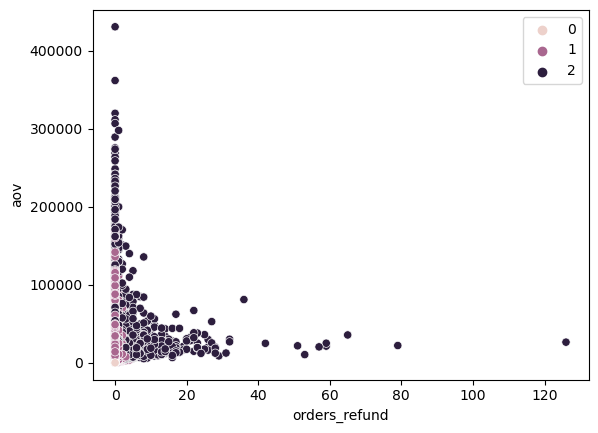

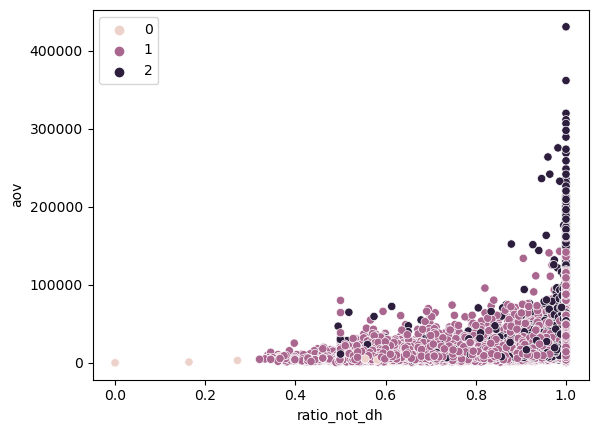

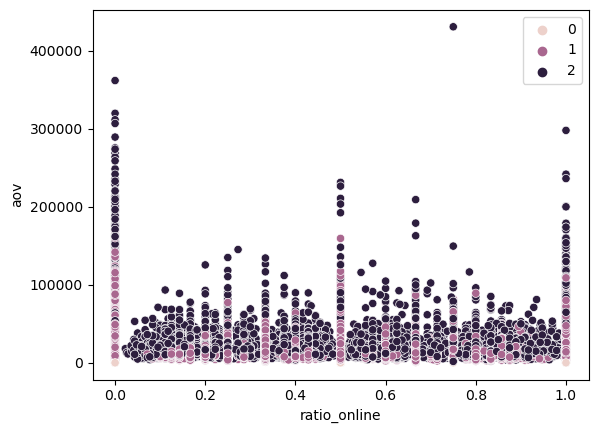

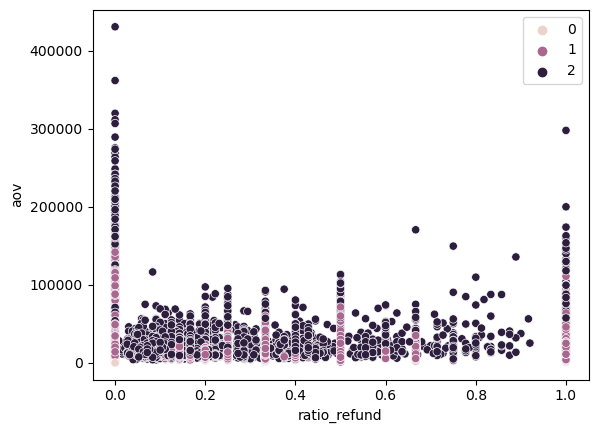

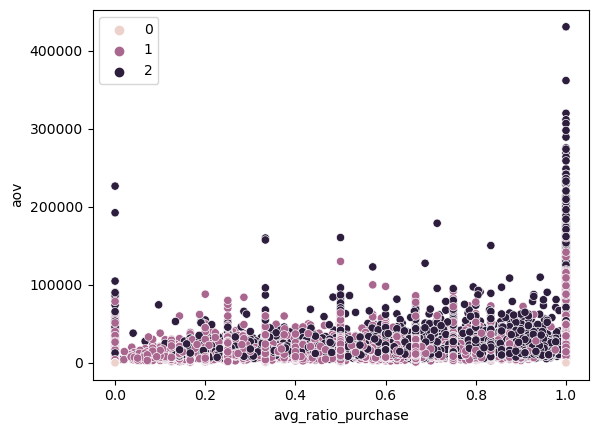

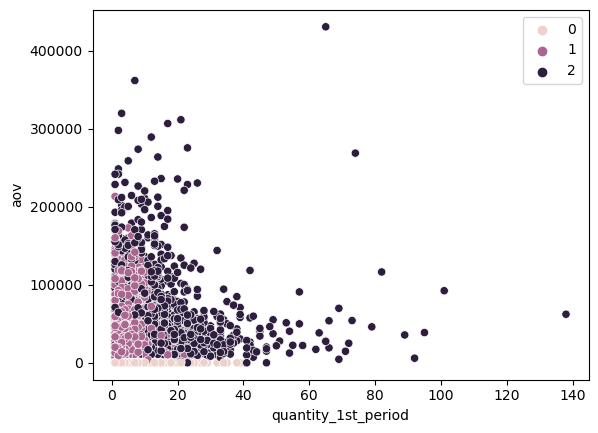

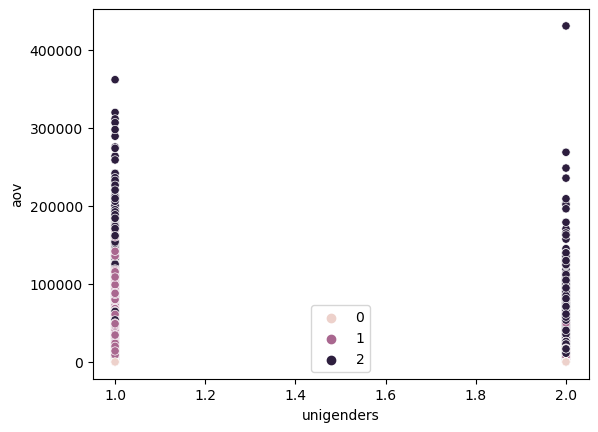

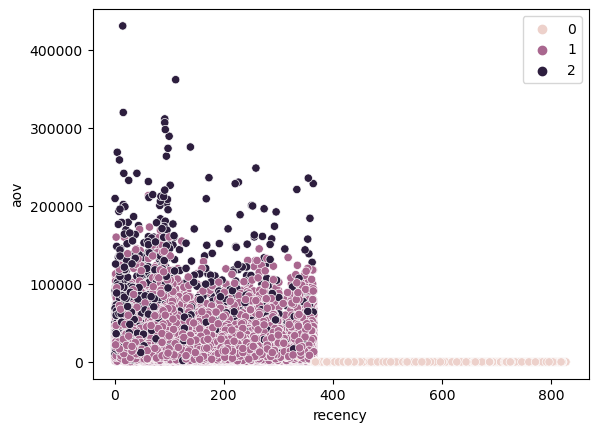

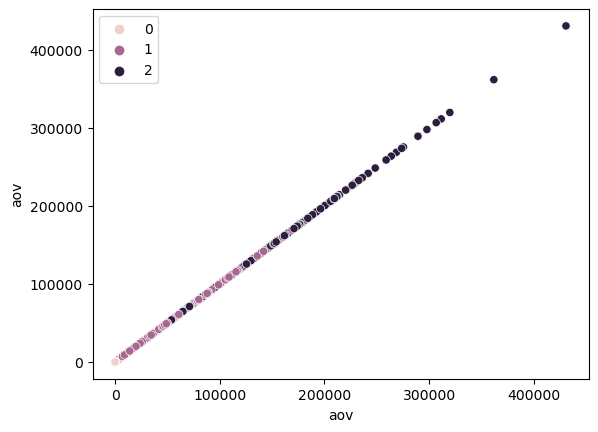

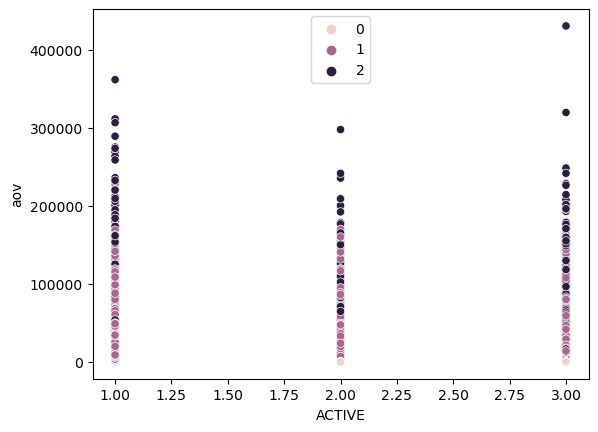

In [ ]:
for col in df.columns:
    sns.scatterplot(data=df, x=col, y = 'aov', hue=kmeans.labels_);
    plt.show()

In [67]:
tab = pd.crosstab(df['ACTIVE'], kmeans.labels_, margins = True)
tab.columns = ['Когда то что то купили',
             'Средний Ср. Чек, реже забирают из пункта выдачи и реже возвращают после получения',
             'Высокий Ср. Чек, Заказывают, возвращают после получения, в основном покупают в онлайне, Забирают товар и ПВ', 'all']
tab.index = ['Грейд Активности 1','Грейд Активности 2', 'Грейд Активности 3'] + ['all']

In [68]:
tab

,Когда то что то купили,"Средний Ср. Чек, реже забирают из пункта выдачи и реже возвращают после получения","Высокий Ср. Чек, Заказывают, возвращают после получения, в основном покупают в онлайне, Забирают товар и ПВ",all
Грейд Активности 1,0,92584,2726,95310
Грейд Активности 2,66862,36492,4092,107446
Грейд Активности 3,54644,34223,10496,99363
all,121506,163299,17314,302119


# Выводы
Больше всего клиентов второго грейда по активности, эти клиенты изберательны в своих покупках, они внимательно осматривают товар в пункте выдачи у них медианный средний чек. Эти клиенты теряют актвиность ближе к концу периода, возможно им стоит предлагать льготные условия для удержания их на нашем маркете.
Клиенты которые остаются в нашем маркете имеют низкий чек, достаточно редко заказывают.
Скорее всего самые топовые клиенты второго грейда Активности среди этих людей почти половина приносит медианный средний чек, и не возвращают товар после выкупа.

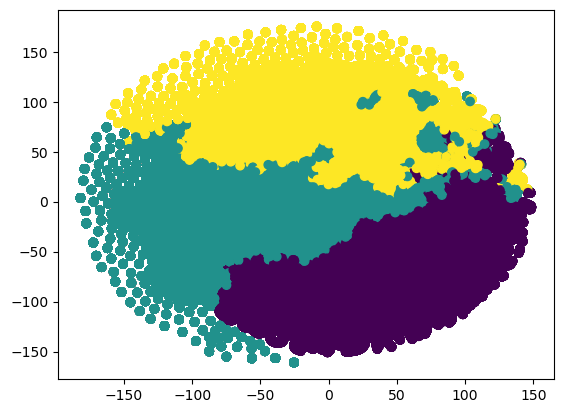

In [44]:

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(df_scaled)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=df['ACTIVE'])